In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import talib as ta
from copy import copy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score,classification_report

In [2]:
from ta_suite import ta_suite
from ta_signals import ta_signals
from trading import act
from trading import pnl_profile

In [3]:
nifty = pd.read_csv(r"C:\Users\1987h\Downloads\Data science, machine learning and Quant Trading\algorithmic trading\GetZerodhaData\NIFTY 50.csv")

In [4]:
tt = ta_suite(nifty)
df = tt.combine()

In [1]:
df.head()

NameError: name 'df' is not defined

# RandomForestClassifier for feature selection

In [6]:
df.columns

Index(['Date', 'Time', 'Open', 'Slowk', 'Slowd', 'MiddleBand', 'UpperBand_2',
       'LowerBand_2', 'BandSplit_2', 'UpperBand_1', 'LowerBand_1', 'BRatio_2',
       'RSI', 'ema_50_21', 'ema_100_50', 'ema_200_100', 'CCI', 'ATR', 'SAR',
       'CORR', 'returns', 'future returns', 'future returns(classifier)'],
      dtype='object')

In [47]:
# features
features = ['Slowk', 'Slowd','BandSplit_2','BRatio_2','RSI', 'ema_50_21', 'ema_100_50',
       'ema_200_100', 'CCI', 'ATR','SAR', 'CORR','returns']

#preparing the data for training and testing
X = df[features]
y = df['future returns(classifier)']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,shuffle=False)

In [48]:
X_train.corr(method='pearson')

,Slowk,Slowd,BandSplit_2,BRatio_2,RSI,ema_50_21,ema_100_50,ema_200_100,CCI,ATR,SAR,CORR,returns
Slowk,1.000000,0.894189,-0.025096,0.667353,0.636918,-0.192750,-0.113384,-0.064926,0.789637,-0.051707,-0.027398,0.032523,0.191715
Slowd,0.894189,1.000000,-0.038822,0.403421,0.641144,-0.240272,-0.136139,-0.075990,0.739664,-0.062137,-0.018614,0.035417,0.074083
BandSplit_2,-0.025096,-0.038822,1.000000,-0.008767,-0.059371,0.100314,0.111347,0.133163,-0.023570,0.577409,-0.028601,0.102970,-0.028152
BRatio_2,0.667353,0.403421,-0.008767,1.000000,0.524939,-0.095176,-0.054863,-0.030287,0.672254,-0.031335,-0.030256,0.025923,0.493100
RSI,0.636918,0.641144,-0.059371,0.524939,1.000000,-0.666953,-0.406995,-0.212440,0.778646,-0.128694,0.002311,0.054880,0.239420
ema_50_21,-0.192750,-0.240272,0.100314,-0.095176,-0.666953,1.000000,0.825455,0.516614,-0.254794,0.222364,-0.064665,-0.037872,-0.024185
ema_100_50,-0.113384,-0.136139,0.111347,-0.054863,-0.406995,0.825455,1.000000,0.852236,-0.127069,0.269902,-0.112860,-0.030459,-0.011638
ema_200_100,-0.064926,-0.075990,0.133163,-0.030287,-0.212440,0.516614,0.852236,1.000000,-0.065012,0.315274,-0.188597,-0.020839,-0.006889
CCI,0.789637,0.739664,-0.023570,0.672254,0.778646,-0.254794,-0.127069,-0.065012,1.000000,-0.063202,-0.021776,0.048052,0.257204
ATR,-0.051707,-0.062137,0.577409,-0.031335,-0.128694,0.222364,0.269902,0.315274,-0.063202,1.000000,-0.069920,0.000623,-0.011148


In [49]:
#Create a random forest classifier
clf=RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=-1)
#Train the classifier
clf.fit(X_train, y_train)

#Print the name and gini importance of each feature
for feature in zip(features, clf.feature_importances_):
    print(feature)

('Slowk', 0.07536849637184556)
('Slowd', 0.07662148897450509)
('BandSplit_2', 0.07666742748058009)
('BRatio_2', 0.07826763800130745)
('RSI', 0.07827207252937639)
('ema_50_21', 0.07336220241830584)
('ema_100_50', 0.0719417625563189)
('ema_200_100', 0.07294680653002869)
('CCI', 0.07783650267685777)
('ATR', 0.07565046405618563)
('SAR', 0.07571578771240403)
('CORR', 0.08897260068354026)
('returns', 0.07837675000874408)


In [50]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.5411059378786912

In [51]:
def baseline(X_test):
    X = copy(X_test)
    X = X.reset_index(drop=True)
    total = X.shape[0]
    positives = X.loc[X["returns"]>0,:].shape[0]
    negatives = total - positives
    if(positives>negatives):
        print("When always predicting positive: ")
        return(f"Baseline accuracy of {positives/total}")
    else:
        print("When always predicting negative: ")
        return(f"Baseline accuracy of {negatives/total}")

baseline(X_test)
    

When always predicting negative: 


'Baseline accuracy of 0.5037948848778621'

nan
nan


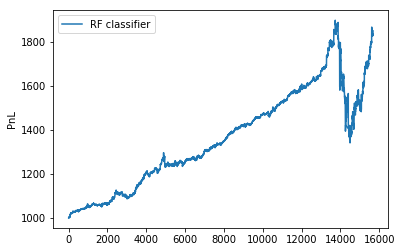

In [53]:
X,pnl = pnl_profile(X_test,y_pred)

Using gridsearch

In [54]:
rfc=RandomForestClassifier(random_state=42, n_jobs=-1)

In [55]:
param_grid = { 'n_estimators':[200], \
              'max_depth':[10],\
             'max_features': ['auto', 'sqrt', 'log2'],\
             'criterion' :['gini', 'entropy']}

In [56]:
# CV_rfc = GridSearchCV(estimator=rfc,param_grid=param_grid,cv=3)
# CV_rfc.fit(X_train, y_train)

-CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 200}

In [57]:
# CV_rfc.best_params_

In [62]:
clf=RandomForestClassifier(n_estimators=500,max_depth=10,criterion= 'gini',max_features= 'auto',random_state=0,n_jobs=-1)
#Train the classifier
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [59]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.541361056189808

nan
nan


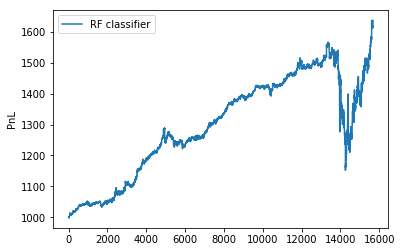

In [60]:
X,pnl = pnl_profile(X_test,y_pred)

In [61]:
X.tail()

,returns,future returns,signal
15674,0.002618,-0.000736,1
15675,-0.000736,0.002008,1
15676,0.002008,0.002716,1
15677,0.002716,0.001180,1
15678,0.001180,NaN,1


In [65]:
(classification_report(y_test, y_pred))

'              precision    recall  f1-score   support\n\n          -1       0.55      0.53      0.54      7898\n           1       0.54      0.56      0.55      7781\n\n   micro avg       0.54      0.54      0.54     15679\n   macro avg       0.54      0.54      0.54     15679\nweighted avg       0.54      0.54      0.54     15679\n'